# Decision Trees

Unlike the “Black Box” nature of Neural Networks, Decision Trees are highly interpretable. They mimic human decision-making by asking a series of questions (If-Else rules) to arrive at a conclusion.

## Decision Tree: Concept
A Decision Tree is a flowchart-like structure where:

- Root Node: Represents the entire population or sample. It gets split into two or more homogeneous sets.
- Decision Node: A sub-node that splits into further sub-nodes.
- Leaf (Terminal) Node: Nodes that do not split (The final decision/class).

### Analogy: Imagine a doctor diagnosing a patient:

1. Is the temperature > 38°C? (Root Node)
- Yes: Do they have a cough? (Decision Node)
- Yes: Flu (Leaf Node)
- No: Infection (Leaf Node)
- No: Healthy (Leaf Node)
  
## Entropy & Information Gain
How does the tree decide which question to ask first? (e.g., Should we check “Temperature” first or “Cough”?).

It uses mathematics to measure impurity or randomness.

#### Entropy (H)
Entropy measures the disorder or uncertainty in a dataset.
- Entropy = 0: Pure node (All samples belong to one class).
- Entropy = 1: High impurity (50% Class A, 50% Class B).
**The formula for Entropy is**
  $H(S) =  - \Sigma p_i log_2(p_i)$
  - Where $p_i$ is the prabability of class i
#### Informatino Gain(IG)
to reduce Entropy. Information Gain calculates the reduction in entropy achieved by splitting the data on a specific attribute.
$$IG (S, A) = H(S) - \Sigma \frac{|S_v|}{|S|}H(S_v)$$

The algorithm calculates IG for every feature and chooses the one with the highest Information Gain as the split node.

### Algorithms: ID3 vs. C4.5 (3.5 & 4.5)
#### ID3 (Iterative Dichotomiser 3)
- The original algorithm.
- Uses Information Gain and Entropy.
- Limitation: It only supports Categorical features (e.g., Color=Red/Blue). It cannot handle numerical data (e.g., Age=25) directly without pre-processing.
- Weakness: It tends to overfit on features with many unique values (like “User ID”).
#### C4.5 (Successor to ID3)
- An improvement over ID3.
- Handles Continuous Data: It can dynamically create thresholds (e.g., if Age > 25 then…).
- Handles Missing Values: Can ignore or impute missing data.
- Pruning: It supports “pruning” the tree after building it to remove weak branches and prevent Overfitting.
- Gain Ratio: Uses Gain Ratio instead of simple Information Gain to solve the bias toward features with many unique values.
  
Note: Scikit-Learn uses the CART algorithm, which is similar to C4.5 but supports both classification and regression.

# Implementation with Scikit-Learn 
I will use the famous Iris Dataset. I will build a tree, train it, and most importantly, visualize it to see the “If-Else” rules it created.

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Model training completed.


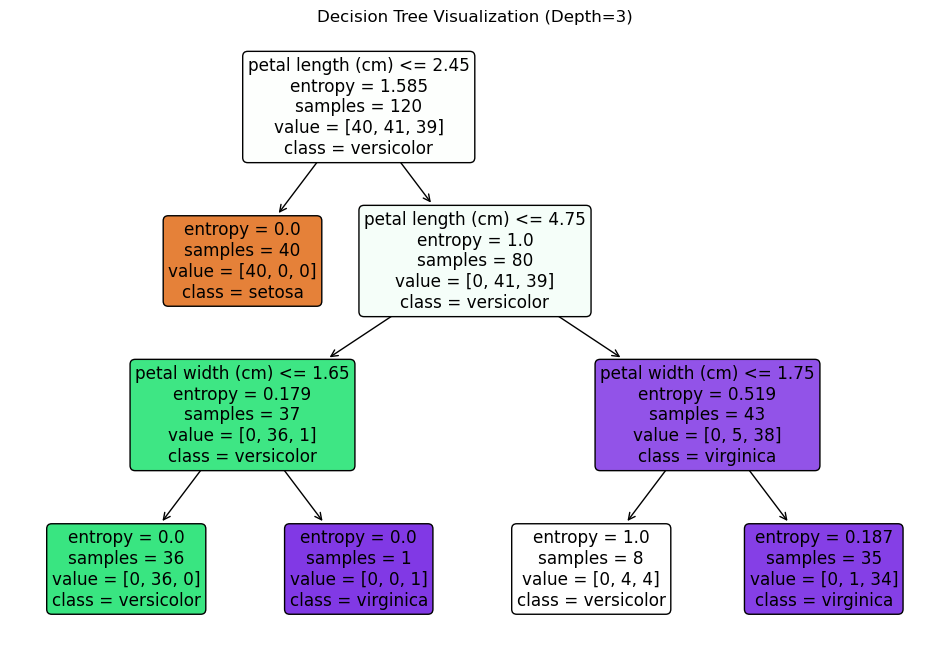

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load datasets
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
class_names = data.target_names

print(f"Features: {feature_names}")
print(f"Classes: {class_names}")

# Split data
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the model
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Train model
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)

print('Model training completed.')

# Visualizing the Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, 
          filled=True, 
          feature_names=feature_names, 
          class_names=class_names,
          rounded=True)
plt.title("Decision Tree Visualization (Depth=3)")
plt.show()

In [29]:
# Accuracy Analysis
# Calculate Accuracy
train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy:     {test_acc:.2f}")

# Check for Overfitting
if train_acc > test_acc + 0.1:
    print("Warning: Potential Overfitting detected (High Train Acc, Low Test Acc).")
else:
    print("Model generalization looks good.")


Training Accuracy: 0.96
Test Accuracy:     1.00
Model generalization looks good.


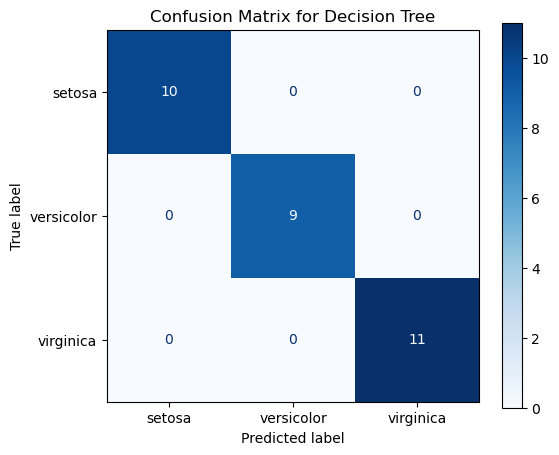


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [31]:
# Confusion Matrix Analysis
# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plotting
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# Detailed Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))
